In [1]:
import matplotlib.pyplot as plt
from MRLS_Class import MRLS
import numpy as np
import seaborn as sns

## Dados Aleatórios

In [2]:
y = np.random.normal(5, 3,20)
x = np.array([np.random.normal(y[i], 1,1) for i in range(len(y))])

x=x.reshape(-1,1)

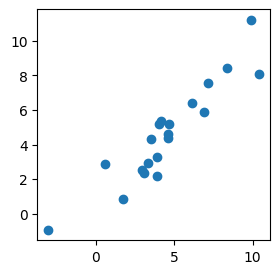

In [3]:
fig=plt.figure(figsize=(3,3))

plt.scatter(x,y)

In [4]:
model = MRLS()
model.Treino(x,y)
y_predict = model.Predizer(x)

Text([-3.04765939], [10.43018475], 'y=0.792+0.844x')

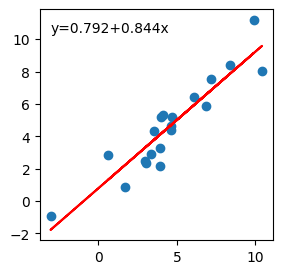

In [5]:
fig=plt.figure(figsize=(3,3))

plt.scatter(x,y)
plt.plot(x,y_predict, "red")
plt.text(min(x), max(x), f"y={round(model.beta0[0],3)}+{round(model.beta1[0],3)}x")

In [6]:
model.CoefDet(x,y)

0.8522982230950147

In [7]:
model.Anova(y,y_predict)

,GL,SQ,QM
Regressao,1.0,130.134047,130.134047
Residuo,18.0,22.552001,1.252889
Total,19.0,152.686048,8.036108


In [8]:
residuos = y - y_predict
residuos

array([ 0.67955276, -1.02007929,  1.56461192, -1.39259588,  0.57231792,
        0.4672845 , -0.80205532, -0.0651781 , -0.68570706, -1.93733414,
       -0.80771653,  0.85896786,  1.03323234,  0.41303783, -0.72828619,
        2.04921953,  1.06428822, -0.2987702 , -1.53118634,  0.56639617])

Text(0.5, 0, 'Previsão')

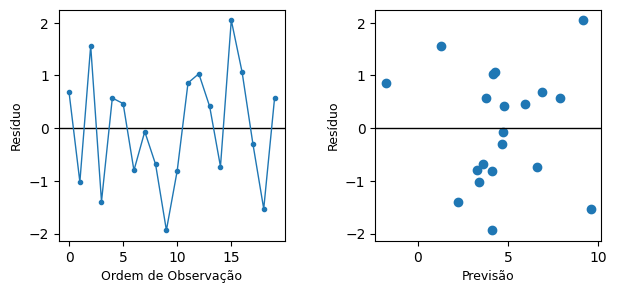

In [9]:
fig=plt.figure(figsize=(7,3))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(1,2,1)

plt. axhline(y=0,xmin=0,xmax=len(y),color='black', linewidth=1)
plt.plot(range(len(residuos)),residuos,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(1,2,2)

plt.scatter(y_predict,residuos)
plt.axhline(y=0,xmin=0,xmax=len(y),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

Text(0.5, 0, 'Resíduo')

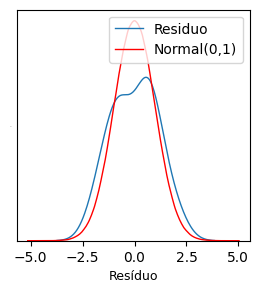

In [10]:
fig=plt.figure(figsize=(3,3))

normal = np.random.normal(0, 1,2000000)

sns.kdeplot(residuos,label="Residuo", linewidth=1)
sns.kdeplot(normal,label='Normal(0,1)', linewidth=1,color='red')
plt.legend()
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

In [11]:
model.Teste_B0(x,y,y_predict)

(0.09689592454179885, True)

In [12]:
model.Teste_B1(y,y_predict)

(6.664350071794445e-09, False)

## Dados sem Intercepto

In [13]:
y = np.array([1,2.4,3.1,3.8,5])
x = np.array([1,2,3,4,5])

x=x.reshape(-1,1)

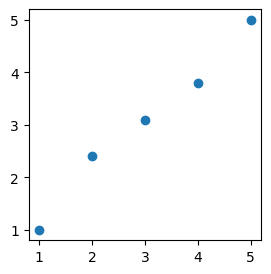

In [14]:
fig=plt.figure(figsize=(3,3))

plt.scatter(x,y)

### Modelo Usando o intercepto

In [15]:
model = MRLS()
model.Treino(x,y)
y_predict = model.Predizer(x)

Text([1], [5], 'y=0.24+0.94x')

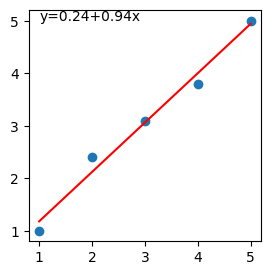

In [16]:
fig=plt.figure(figsize=(3,3))

plt.scatter(x,y)
plt.plot(x,y_predict, "red")
plt.text(min(x), max(x), f"y={round(model.beta0[0],3)}+{round(model.beta1[0],3)}x")

In [17]:
model.CoefDet(x,y)

0.9826512455516011

In [18]:
model.Anova(y,y_predict)

,GL,SQ,QM
Regressao,1.0,8.836,8.836
Residuo,3.0,0.156,0.052
Total,4.0,8.992,2.248


In [19]:
model.Teste_B0(x,y,y_predict)

(0.3895614625487607, True)

### Modelo sem Intercepto

In [23]:
model = MRLS(False)
model.Treino(x,y)
y_predict = model.Predizer(x)

Text([1], [5], 'y=0+1.005x')

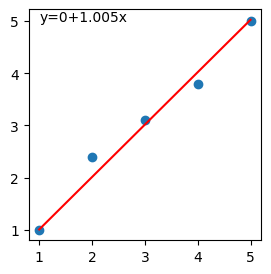

In [32]:
fig=plt.figure(figsize=(3,3))

plt.scatter(x,y)
plt.plot(x,y_predict, "red")
plt.text(min(x), max(x), f"y={round(model.beta0,3)}+{round(model.beta1[0][0],3)}x")

In [33]:
model.CoefDet(x,y)

0.9962665537293738

In [34]:
model.Anova(y,y_predict)

,GL,SQ,QM
Regressao,1.0,55.601636,55.601636
Residuo,3.0,0.208364,0.069455
Total,4.0,55.810000,13.952500
